Loading (importing) library tools needed for Sales Analysis project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
import numpy as np
from sklearn.linear_model import LinearRegression



Create function to format floats to currency format

In [3]:
def format_to_currency(figure):
    figure = "${:,.2f}".format(figure) 
    return figure

Establish connection with remote data and saving the connection as a varible

In [4]:
raw_sales_data = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb", user="root", password="D3v$tudent", use_pure=True)

Join sales data table and cities data table into one dataframe
and view top of it 


In [5]:
cities_sales_together= 'SELECT salesdb.sales.*, salesdb.cities.city FROM salesdb.sales JOIN  salesdb.cities ON salesdb.sales.City_ID = salesdb.cities.City_ID'
raw_sales_df = pd.read_sql_query(cities_sales_together, raw_sales_data)
raw_sales_df.head()

C:\Users\mptur\AppData\Local\Temp\ipykernel_19132\4244727221.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  raw_sales_df = pd.read_sql_query(cities_sales_together, raw_sales_data)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,city
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,Seattle


Formatting Date to Panda datetime format with hours and removing seperate hour time column
Format all monatery columns to standard format

In [6]:
raw_sales_df['Date'] = pd.to_datetime(raw_sales_df['Date'] + ' ' + raw_sales_df['Time'])
raw_sales_df = raw_sales_df.drop(columns='Time')
raw_sales_df['Total']= raw_sales_df['Total'].round(decimals=2)
raw_sales_df['Gross_Income']= raw_sales_df['Gross_Income'].round(decimals=2)
raw_sales_df.rename(columns={'city':'City'}, inplace=True)
raw_sales_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.56,2019-03-13 19:44:00,Credit card,320.53,16.03,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.92,2019-01-17 12:36:00,Ewallet,125.64,6.28,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.56,2019-03-20 17:52:00,Cash,126.25,6.31,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.03,2019-03-05 18:02:00,Credit card,457.17,22.86,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.11,2019-02-27 12:22:00,Ewallet,42.96,2.15,6.6,1,Seattle


Checking Data for Null values and removing them if needed

In [7]:
sales_df = raw_sales_df.drop(columns='Sales_Tax')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Total          1000 non-null   float64       
 7   Date           1000 non-null   datetime64[ns]
 8   Payment        1000 non-null   object        
 9   COGS           1000 non-null   float64       
 10  Gross_Income   1000 non-null   float64       
 11  Rating         1000 non-null   float64       
 12  City_ID        1000 non-null   int64         
 13  City           1000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 109.5

Check for duplicate rows

In [8]:
sales_df.duplicated().sort_values()

0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

Creating tool to format bar charts.

In [9]:
def label_bars(chart_name):
    chart = chart_name.plot.bar()
    chart.bar_label(chart.containers[0], label_type='edge')

## Comparing sales data by customer type

In [55]:
x=np.arange(2)
normal_sales = sales_df.loc[sales_df['Customer_Type']=='Normal', 'Total'].sum()
member_sales = sales_df.loc[sales_df['Customer_Type']=='Member', 'Total'].sum()
count_normal_sales = len(sales_df[sales_df['Customer_Type']=='Normal'])
count_member_sales = len(sales_df[sales_df['Customer_Type']=='Member'])
compare_sales = [normal_sales, member_sales]
compare_transactions = [count_normal_sales, count_member_sales]
print(f"Amount of sales to members was {format_to_currency(member_sales)} on {count_member_sales} transactions and the amount of sales to nonmembers was {format_to_currency(normal_sales)} on {count_normal_sales} transactions.")



Amount of sales to members was $164,223.52 on 501 transactions and the amount of sales to nonmembers was $158,743.30 on 499 transactions.


C:\Users\mptur\AppData\Local\Temp\ipykernel_19132\3155109949.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_customer_type = sales_df.groupby('Customer_Type').sum()


Text(0, 0.5, 'Transactions')

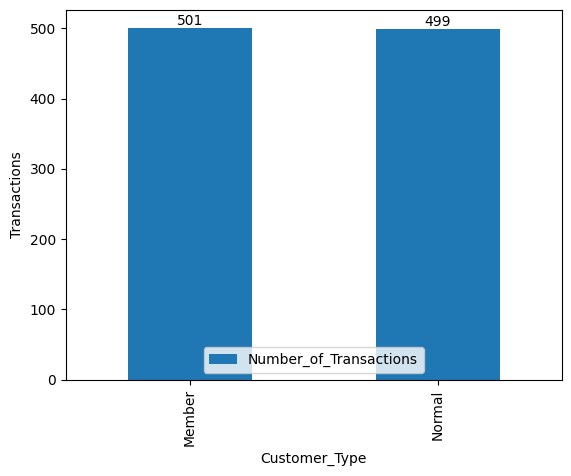

In [11]:
sales_by_customer_type = sales_df.groupby('Customer_Type').sum()
sales_by_customer_type['Number_of_Transactions'] = sales_df.groupby(['Customer_Type'])['Customer_Type'].count()
sales_by_customer_type = sales_by_customer_type.drop(['Unit_Price', 'COGS', 'Quantity', 'Gross_Income', 'Rating', 'City_ID'], axis=1)
sales_by_customer_type.loc[:,'Total'] = sales_by_customer_type['Total'].map('${:,.2f}'.format)
label_bars(sales_by_customer_type)
plt.legend(loc='lower center')
plt.ylabel('Transactions')

## Comparing sales per location.

C:\Users\mptur\AppData\Local\Temp\ipykernel_19132\497667553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_location = sales_df.groupby('City').sum()


Text(0, 0.5, 'Transactions')

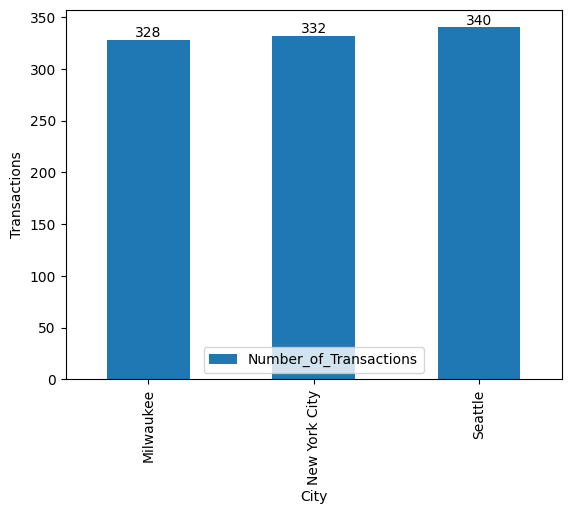

In [12]:
sales_by_location = sales_df.groupby('City').sum()
sales_by_location['Number_of_Transactions'] = sales_df.groupby(['City'])['City'].count()
sales_by_location = sales_by_location.drop(['Unit_Price', 'COGS', 'Quantity', 'Gross_Income', 'Rating', 'City_ID', 'Total'], axis=1)
label_bars(sales_by_location)
plt.ylabel('Transactions')



## Comparing sales by Product Line

In [13]:
sales_by_product_line = sales_df.groupby('Product_Line').sum('Total')
sales_by_product_line['Number_of_Transactions'] = sales_df.groupby(['Product_Line'])['Product_Line'].count()
sales_by_product_line = sales_by_product_line.drop(['Unit_Price', 'COGS', 'Quantity', 'Gross_Income', 'Rating', 'City_ID'], axis=1)
sales_by_product_line.loc[:,'Total'] = sales_by_product_line['Total'].map('${:,.2f}'.format)
sales_by_product_line

,Total,Number_of_Transactions
Product_Line,,
Electronic accessories,"$54,337.52",170
Fashion accessories,"$54,305.88",178
Food and beverages,"$56,144.86",174
Health and beauty,"$49,193.81",152
Home and lifestyle,"$53,861.87",160
Sports and travel,"$55,122.88",166


Text(0, 0.5, 'Transactions')

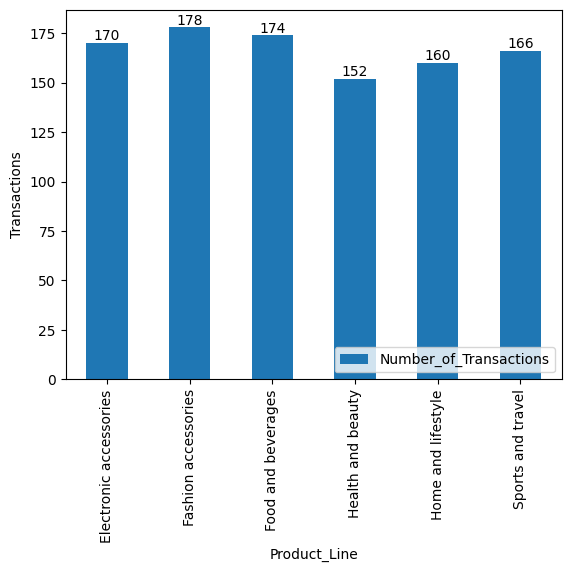

In [14]:
sales_by_product_line = sales_by_product_line.drop(['Total'], axis=1)
label_bars(sales_by_product_line)
plt.legend(loc='lower right')
plt.ylabel('Transactions')

## Finding average rating

In [15]:
overall_sales_rating = (sales_df['Rating'].mean()).round(2)
print(f"The overall average rating for all transactions is {overall_sales_rating}.")

The overall average rating for all transactions is 6.97.


## Comparing income by product line.

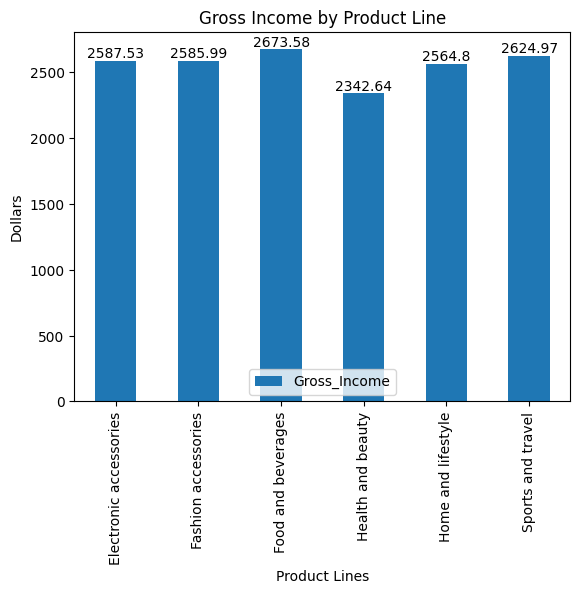

In [16]:
sales_by_product_line = sales_df.groupby('Product_Line').sum('Total')
# sales_by_product_line['Profit_Margin'] = ((sales_by_product_line['Gross_Income'] / sales_by_product_line['Total'])*100).round(decimals=2)
sales_by_product_line = sales_by_product_line.drop(['Unit_Price', 'Quantity', 'Rating', 'City_ID', 'COGS'], axis=1)
sales_by_product_line.loc[:,'Total'] = sales_by_product_line['Total'].map('${:,.2f}'.format)
label_bars(sales_by_product_line)
plt.title("Gross Income by Product Line")
plt.xlabel('Product Lines')
plt.ylabel('Dollars')
plt.legend(loc='lower center')


C:\Users\mptur\AppData\Local\Temp\ipykernel_19132\998585076.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_product_line_profit = sales_df.groupby('Product_Line').sum()


Text(0, 0.5, '')

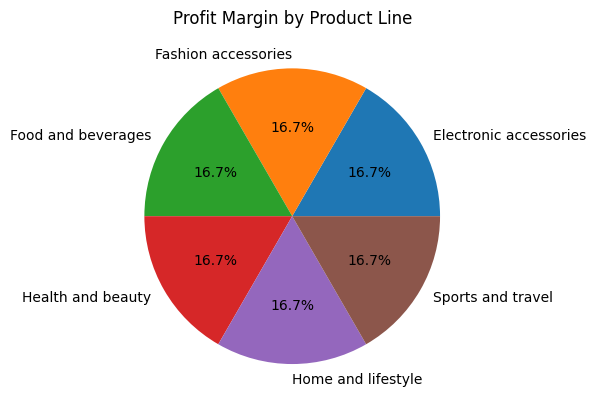

In [17]:

sales_by_product_line_profit = sales_df.groupby('Product_Line').sum()
sales_by_product_line_profit['Profit_Margin'] = ((sales_by_product_line_profit['Gross_Income']
                                                   / sales_by_product_line_profit['Total'])*100).round(decimals=2)
sales_by_product_line_profit = sales_by_product_line_profit.drop(['Unit_Price', 'Quantity', 'Rating', 'City_ID', 'COGS', 'Total', 'Gross_Income'], axis=1)
sales_by_product_line_profit.plot.pie(subplots=True, legend=False, autopct='%1.1f%%')
plt.title("Profit Margin by Product Line")
plt.ylabel('')


## Income from sale brokendown by gender.

C:\Users\mptur\AppData\Local\Temp\ipykernel_19132\518584374.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_product_line_by_city_gender = sales_df.groupby(groupby_columns).sum()


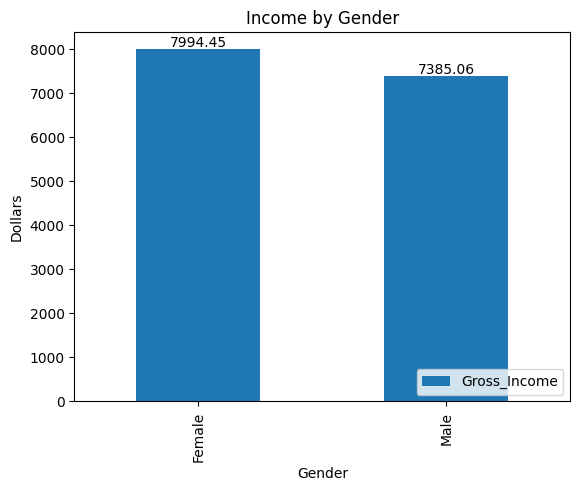

In [18]:
groupby_columns = ['Gender']
sales_by_product_line_by_city_gender = sales_df.groupby(groupby_columns).sum()
# sales_by_product_line_by_city['Profit_Margin'] = ((sales_by_product_line_by_city['Gross_Income'] / sales_by_product_line_by_city['Total'])*100).round(decimals=2)
sales_by_product_line_by_city_gender = sales_by_product_line_by_city_gender.drop(['COGS','Unit_Price', 'Quantity', 'Rating', 'City_ID', 'Total'], axis=1)
# sales_by_product_line_by_city.loc[:,'Total'] = sales_by_product_line_by_city['Total'].map('${:,.2f}'.format)
label_bars(sales_by_product_line_by_city_gender)
plt.title("Income by Gender")
plt.ylabel('Dollars')
plt.legend(loc='lower right')

## Analytic chart to break down the numbers.

In [19]:
sales_df.describe()

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating,City_ID
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,322.966820,307.58738,15.379510,6.97270,1.988000
std,26.494628,2.923431,245.885398,234.17651,11.708842,1.71858,0.817633
min,10.080000,1.000000,10.680000,10.17000,0.510000,4.00000,1.000000
25%,32.875000,3.000000,124.425000,118.49750,5.927500,5.50000,1.000000
50%,55.230000,5.000000,253.850000,241.76000,12.090000,7.00000,2.000000
75%,77.935000,8.000000,471.350000,448.90500,22.445000,8.50000,3.000000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000,3.000000


## Chart that helps us explore the correlation between all sales metrics.

In [20]:
sales_df.corr()

C:\Users\mptur\AppData\Local\Temp\ipykernel_19132\2029100693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_df.corr()


,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating,City_ID
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633967,-0.008778,0.028202
Quantity,0.010778,1.000000,0.705510,0.705510,0.705507,-0.015815,0.015964
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
Gross_Income,0.633967,0.705507,1.000000,1.000000,1.000000,-0.036437,0.041047
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036437,1.000000,0.010238
City_ID,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238,1.000000


Showing the columns with the strongest correlation, as a Scatter Plot

Text(0.5, 1.0, 'Increaced Income as Cost of Goods Increases')

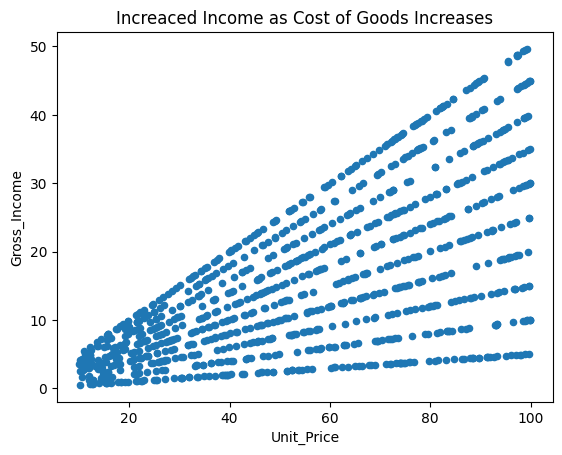

In [21]:
sales_df.plot.scatter(x='Unit_Price', y='Gross_Income')
plt.title("Increaced Income as Cost of Goods Increases")

## Red line plotted to show projected income for more valuable units.

Text(0.5, 1.0, 'Projected Income Increace')

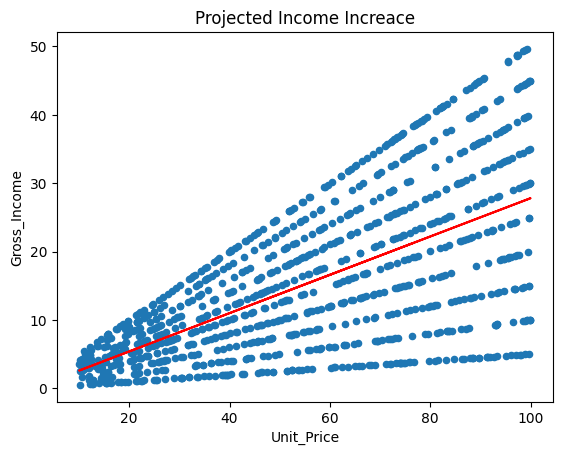

In [22]:
model = LinearRegression()

x = sales_df[['Unit_Price']]
y = sales_df['Gross_Income']

model.fit(x,y)
predict_y = model.predict(x)

sales_df.plot.scatter(x='Unit_Price', y='Gross_Income')
projected_incone = plt.plot(x, predict_y, color = 'red')
plt.title('Projected Income Increace')
